In [1]:
from platform import python_version

print(python_version())




3.6.10


In [2]:
import numpy as np
import pandas as pd
import sys
import scanpy as sc
import anndata as ann
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging
import os
from plotnine import *
import plotnine
import scipy.io

sc.settings.verbosity = 3
sc.logging.print_version_and_date()

Running Scanpy 1.6.0, on 2021-03-01 12:33.


In [3]:
directory = os.getcwd()
directory

'/mnt/ibm_lg/ashleyb/Jupyter_Notebooks/Jupyter_notebooks'

In [4]:
cd /mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/

/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data


# Ingest Data Into Adata object

In [5]:
#get all directories containing matrix,barcodes and features for anndata and sample names
path_list=[]
directory_name=[]
path='/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45'
for root,d_names,f_names in os.walk(path):
    if root.endswith('filtered_feature_bc_matrix'):
        path_list.append(root)
        name=root.split('/')[8]
        directory_name.append(name)


In [6]:
path_list

['/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1031_CD45_Day14/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1276_CD45_Day17/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1024_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1024_CD45_Day16/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1365_CD45_Day2/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1024_CD45_Day24/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1072_CD45_Day8_10x/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1050_CD45_Day8/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1326_CD45_Day20/filtered_feature_bc_matrix',
 '/mnt/ibm

In [7]:
late_list=['COMET_1001_CD45_Day0',
'COMET_1002_CD45_Day0',
'COMET_1072_CD45_Day10','COMET_1115_CD45_Day6','COMET_1154_CD45_Day13','COMET_1158_CD45_Day4','COMET_1233_CD45_Day0','COMET_1264_CD45_Day14','COMET_1271_CD45_Day16',
'COMET_1290_CD45_Day7', 'COMET_1320_CD45_Day13','COMET_1357_CD45_Day7']

In [8]:
early_list =['COMET_1047_CD45_Day2',
'COMET_1154_CD45_Day6',
'COMET_1357_CD45_Day2',
'COMET_1001_CD45_Day0',
'COMET_1002_CD45_Day0',
'COMET_1172_CD45_Day5',
'COMET_1072_CD45_Day4','COMET_1115_CD45_Day6','COMET_1158_CD45_Day4','COMET_1161_CD45_Day3','COMET_1271_CD45_Day12','COMET_1290_CD45_Day7','COMET_1320_CD45_Day13']

In [9]:
early_list_all_IS=['COMET_1047_CD45_Day2',
'COMET_1154_CD45_Day6',
'COMET_1357_CD45_Day2',
'COMET_1172_CD45_Day5',
'COMET_1158_CD45_Day4','COMET_1161_CD45_Day3','COMET_1271_CD45_Day12','COMET_1290_CD45_Day7','COMET_1320_CD45_Day13']

In [10]:
#Ingest early timepoint patient data
early_list_path=[]

for sample in early_list:
    for path in path_list:
        split_name = path.split('/')[8]
        if sample==split_name:
            early_list_path.append(path)

In [11]:
early_list_path

['/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1047_CD45_Day2/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1154_CD45_Day6/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1357_CD45_Day2/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1001_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1002_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1172_CD45_Day5/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1072_CD45_Day4/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1115_CD45_Day6/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1158_CD45_Day4/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashle

In [12]:
#Ingest late timepoint patient data
late_list_path=[]

for sample in late_list:
    for path in path_list:
        split_name = path.split('/')[8]
        if sample==split_name:
            late_list_path.append(path)

In [13]:
late_list_path

['/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1001_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1002_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1072_CD45_Day10/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1115_CD45_Day6/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1154_CD45_Day13/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1158_CD45_Day4/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1233_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1264_CD45_Day14/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1271_CD45_Day16/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/a

In [14]:
adatas_early=[sc.read_10x_mtx(path) for path in early_list_path]

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading fr

In [15]:
adatas_late=[sc.read_10x_mtx(path) for path in late_list_path]

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading fr

In [16]:
#add Identity of early time point
for i in range(len(adatas_early)):
    adatas_early[i].obs['Identity'] = early_list[i]

In [17]:
#add Identity of late time point
for i in range(len(adatas_late)):
    adatas_late[i].obs['Identity']= late_list[i]

In [33]:
#add Identity of early all IS patients
for i in range(len(adatas_early_IS)):
    adatas_early_IS[i].obs['Identity'] = early_list_all_IS[i]

In [19]:
#add patient name to early
ID_list_early =[]
for patient in early_list:
    ID = patient.split('_')[1]
    ID_list_early.append(ID)
for i in range(len(adatas_early)):
    adatas_early[i].obs['Patient']=ID_list_early[i]

In [20]:
adatas_early[5].obs

,Identity,Patient
AAACGGGAGAGAACAG-1,COMET_1172_CD45_Day5,1172
AAACGGGTCTTAACCT-1,COMET_1172_CD45_Day5,1172
AAAGATGAGGCTCATT-1,COMET_1172_CD45_Day5,1172
AAAGCAACAAAGAATC-1,COMET_1172_CD45_Day5,1172
AAAGCAATCGAGGTAG-1,COMET_1172_CD45_Day5,1172
...,...,...
TTTCCTCGTCTTGATG-1,COMET_1172_CD45_Day5,1172
TTTGCGCCAATGGATA-1,COMET_1172_CD45_Day5,1172
TTTGCGCTCTGTCAAG-1,COMET_1172_CD45_Day5,1172
TTTGGTTTCCTTTCTC-1,COMET_1172_CD45_Day5,1172


In [21]:
#add patient name to late
ID_list_late =[]
for patient in late_list:
    ID = patient.split('_')[1]
    ID_list_late.append(ID)
#for i in range(len(adatas_early)):
    #adatas_late[i].obs['Patient']=ID_list_late[i]

In [22]:
adata_merge_early = adatas_early[0].concatenate(adatas_early[1:])

In [23]:
adata_merge_late = adatas_late[0].concatenate(adatas_late[1:])

In [24]:
Early_Bacterial_dict ={'COMET_1047_CD45_Day2':'Yes',
'COMET_1154_CD45_Day6':'Yes',
'COMET_1357_CD45_Day2':'Yes',
'COMET_1001_CD45_Day0':'No',
'COMET_1002_CD45_Day0':'No',
'COMET_1172_CD45_Day5':'Yes',
'COMET_1072_CD45_Day4':'No','COMET_1115_CD45_Day6':'No','COMET_1158_CD45_Day4':'No','COMET_1161_CD45_Day3':'Yes','COMET_1271_CD45_Day12':'No','COMET_1290_CD45_Day7':'No','COMET_1320_CD45_Day13':'No'}

In [25]:
adata_merge_early.obs['VAP']=[Early_Bacterial_dict.get(x) for x in adata_merge_early.obs['Identity']]

In [26]:
Late_Bacterial_dict ={'COMET_1001_CD45_Day0':'No',
 'COMET_1002_CD45_Day0':'No',
 'COMET_1072_CD45_Day10':'No',
 'COMET_1115_CD45_Day6':'No',            
 'COMET_1154_CD45_Day13':'Yes',
 'COMET_1158_CD45_Day4':'No',
'COMET_1233_CD45_Day0':'Yes',
'COMET_1264_CD45_Day14':'Yes',
'COMET_1271_CD45_Day16':'No',                   
 'COMET_1290_CD45_Day7':'No',
 'COMET_1320_CD45_Day13':'No',
 'COMET_1357_CD45_Day7':'Yes'}

In [27]:
adata_merge_late.obs['VAP']=[Late_Bacterial_dict.get(x) for x in adata_merge_late.obs['Identity']]

In [28]:
adata_merge_early.obs['Time']='Early'

In [29]:
adata_merge_late.obs['Time']='Late'

In [30]:
sc.pp.calculate_qc_metrics(adata_merge_early, inplace=True)

In [31]:
sc.pp.calculate_qc_metrics(adata_merge_late, inplace=True)

In [32]:
mt_gene_mask = np.flatnonzero([gene.startswith('MT-') for gene in adata_merge_early.var_names])
adata_merge_early.obs['mt_frac'] = np.sum(adata_merge_early[:, mt_gene_mask].X, axis=1).A1/adata_merge_early.obs['total_counts']
mito_genes = adata_merge_early.var_names.str.startswith('MT-')
adata_merge_early.obs['percent_mito'] = np.sum(adata_merge_early[:, mito_genes].X, axis=1).A1 / np.sum(adata_merge_early.X, axis=1).A1
ribo_genes = adata_merge_early.var_names.str.startswith(('RPS','RPL'))
adata_merge_early.obs['percent_ribo'] = np.sum(adata_merge_early[:, ribo_genes].X, axis=1).A1 / np.sum(adata_merge_early.X, axis=1).A1
sars_genes = adata_merge_early.var_names.str.startswith('SARS2')
adata_merge_early.obs['percent_SARS'] = np.sum(adata_merge_early[:, sars_genes].X, axis=1).A1 / np.sum(adata_merge_early.X, axis=1).A1



/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [33]:
mt_gene_mask = np.flatnonzero([gene.startswith('MT-') for gene in adata_merge_late.var_names])
adata_merge_late.obs['mt_frac'] = np.sum(adata_merge_late[:, mt_gene_mask].X, axis=1).A1/adata_merge_late.obs['total_counts']
mito_genes = adata_merge_late.var_names.str.startswith('MT-')
adata_merge_late.obs['percent_mito'] = np.sum(adata_merge_late[:, mito_genes].X, axis=1).A1 / np.sum(adata_merge_late.X, axis=1).A1
ribo_genes = adata_merge_late.var_names.str.startswith(('RPS','RPL'))
adata_merge_late.obs['percent_ribo'] = np.sum(adata_merge_late[:, ribo_genes].X, axis=1).A1 / np.sum(adata_merge_late.X, axis=1).A1
sars_genes = adata_merge_late.var_names.str.startswith('SARS2')
adata_merge_late.obs['percent_SARS'] = np.sum(adata_merge_late[:, sars_genes].X, axis=1).A1 / np.sum(adata_merge_late.X, axis=1).A1




normalizing counts per cell
    finished (0:00:00)


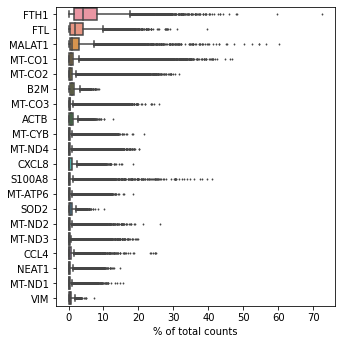

In [34]:
sc.pl.highest_expr_genes(adata_merge_early, n_top=20 )

normalizing counts per cell
    finished (0:00:00)


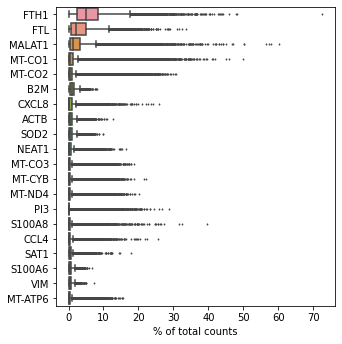

In [35]:
sc.pl.highest_expr_genes(adata_merge_late, n_top=20)

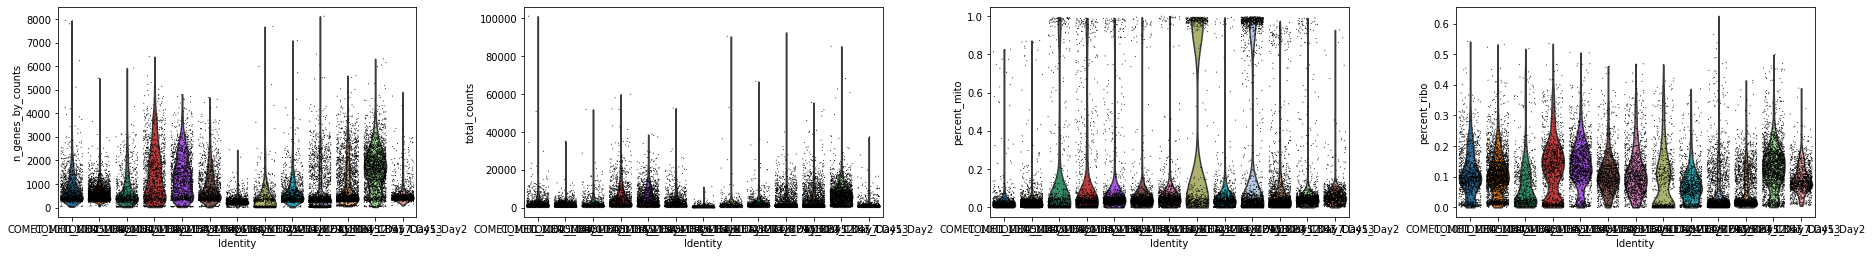

In [38]:
sc.pl.violin(adata_merge_early, ['n_genes_by_counts', 'total_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, groupby = 'Identity')

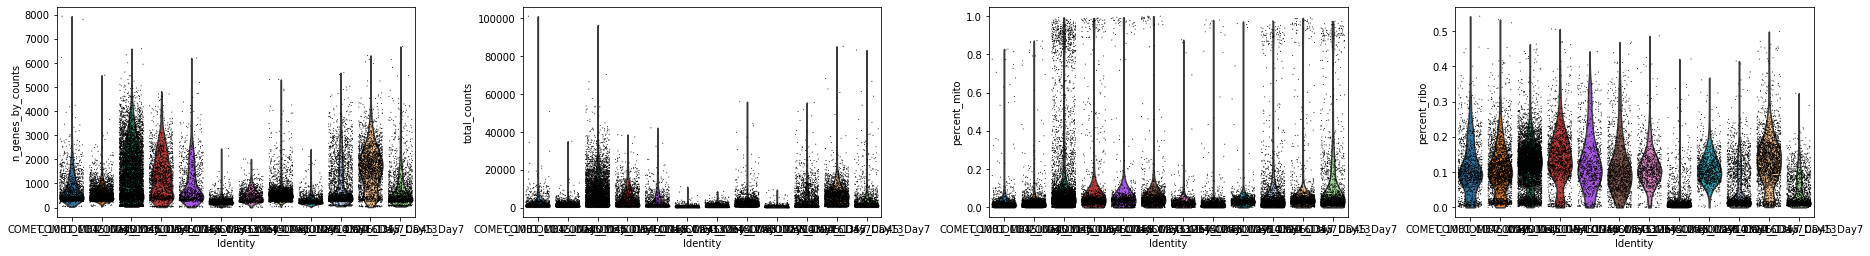

In [39]:
sc.pl.violin(adata_merge_late, ['n_genes_by_counts', 'total_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, groupby = 'Identity')

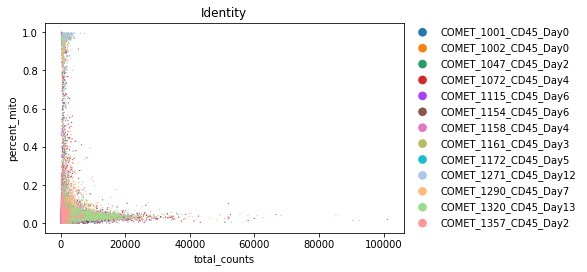

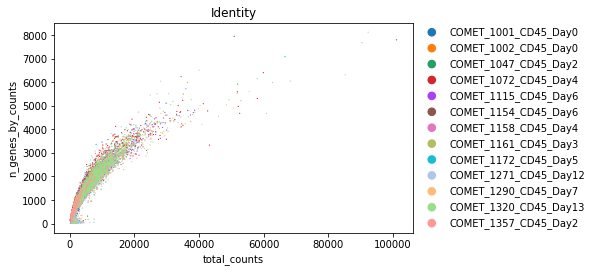

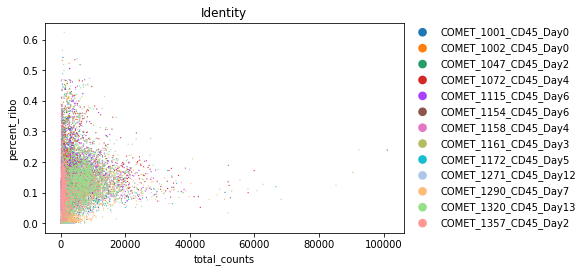

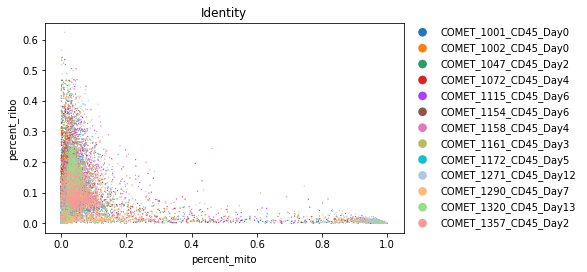

In [40]:
sc.pl.scatter(adata_merge_early, x='total_counts', y='percent_mito', color="Identity")
sc.pl.scatter(adata_merge_early, x='total_counts', y='n_genes_by_counts', color="Identity")
sc.pl.scatter(adata_merge_early, x='total_counts', y='percent_ribo', color="Identity")
sc.pl.scatter(adata_merge_early, x='percent_mito', y='percent_ribo', color="Identity")

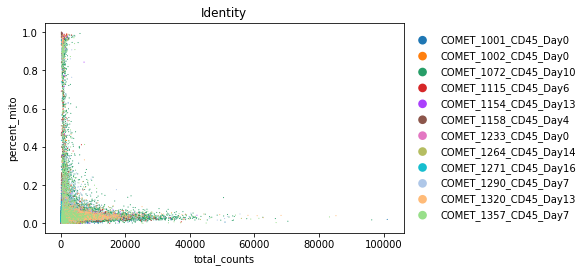

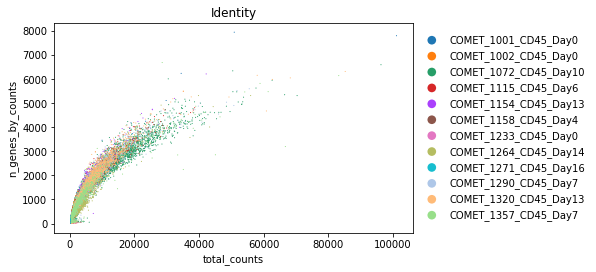

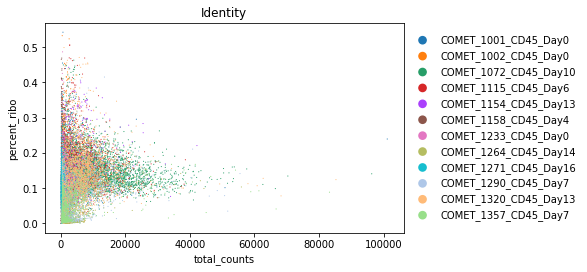

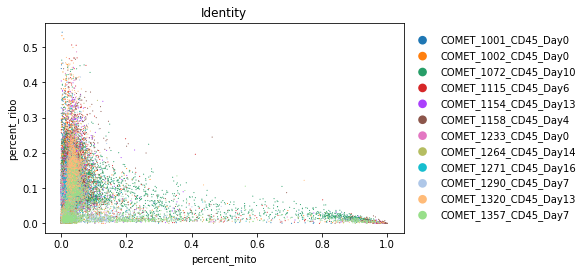

In [41]:
sc.pl.scatter(adata_merge_late, x='total_counts', y='percent_mito', color="Identity")
sc.pl.scatter(adata_merge_late, x='total_counts', y='n_genes_by_counts', color="Identity")
sc.pl.scatter(adata_merge_late, x='total_counts', y='percent_ribo', color="Identity")
sc.pl.scatter(adata_merge_late, x='percent_mito', y='percent_ribo', color="Identity")

# Filtering Cells

In [42]:
sc.pp.filter_cells(adata_merge_early, min_genes=200)
sc.pp.filter_genes(adata_merge_early, min_cells=3)
print(adata_merge_early.n_obs, adata_merge_early.n_vars)

filtered out 1925 cells that have less than 200 genes expressed


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


filtered out 13426 genes that are detected in less than 3 cells
18298 20123


In [43]:
sc.pp.filter_cells(adata_merge_late, min_genes=200)
sc.pp.filter_genes(adata_merge_late, min_cells=3)

print(adata_merge_early.n_obs, adata_merge_early.n_vars)
print(adata_merge_late.n_obs, adata_merge_late.n_vars)

filtered out 1814 cells that have less than 200 genes expressed
filtered out 12972 genes that are detected in less than 3 cells
18298 20123
24065 20577


In [44]:
sc.pp.filter_cells(adata_merge_early, max_counts = 30000)
print('Number of cells after max count filter: {:d}'.format(adata_merge_early.n_obs))


sc.pp.filter_cells(adata_merge_early, min_counts=500)
print('Number of cells after min count filter:{:d}'.format(adata_merge_early.n_obs))

adata_merge_early = adata_merge_early[adata_merge_early.obs['percent_mito'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata_merge_early.n_obs))


filtered out 72 cells that have more than 30000 counts
Number of cells after max count filter: 18226
filtered out 411 cells that have less than 500 counts
Number of cells after min count filter:17815
Number of cells after MT filter: 17702


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [45]:
sc.pp.filter_cells(adata_merge_late, max_counts = 30000)
print('Number of cells after max count filter: {:d}'.format(adata_merge_late.n_obs))


sc.pp.filter_cells(adata_merge_late, min_counts=500)
print('Number of cells after min count filter:{:d}'.format(adata_merge_late.n_obs))

adata_merge_late = adata_merge_late[adata_merge_late.obs['percent_mito'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata_merge_late.n_obs))



filtered out 207 cells that have more than 30000 counts
Number of cells after max count filter: 23858
filtered out 913 cells that have less than 500 counts
Number of cells after min count filter:22945
Number of cells after MT filter: 22768


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [46]:
adata_merge_late.obs.groupby(['Identity']).size().to_frame('count')

,count
Identity,
COMET_1001_CD45_Day0,1261
COMET_1002_CD45_Day0,2591
COMET_1072_CD45_Day10,5137
COMET_1115_CD45_Day6,1393
COMET_1154_CD45_Day13,923
COMET_1158_CD45_Day4,428
COMET_1233_CD45_Day0,724
COMET_1264_CD45_Day14,3743
COMET_1271_CD45_Day16,396


In [47]:
adata_merge_early.obs.groupby(['Identity']).size().to_frame('count')

,count
Identity,
COMET_1001_CD45_Day0,1261
COMET_1002_CD45_Day0,2591
COMET_1047_CD45_Day2,684
COMET_1072_CD45_Day4,1052
COMET_1115_CD45_Day6,1393
COMET_1154_CD45_Day6,1218
COMET_1158_CD45_Day4,428
COMET_1161_CD45_Day3,369
COMET_1172_CD45_Day5,1013


In [48]:
#remove mito genes
non_mito_genes_list = [name for name in adata_merge_early.var_names if not name.startswith('MT-')]
adata_merge_early_no_mito = adata_merge_early[:, non_mito_genes_list]


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [49]:
#remove mito genes
non_mito_genes_list = [name for name in adata_merge_late.var_names if not name.startswith('MT-')]
adata_merge_late_no_mito = adata_merge_late[:, non_mito_genes_list]

/home/ashleyb/.local/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.


normalizing counts per cell
    finished (0:00:00)


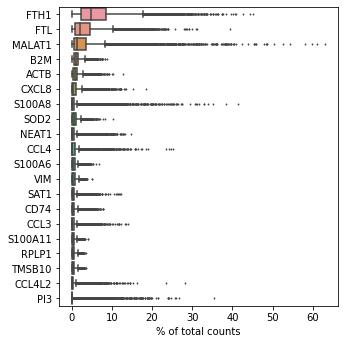

In [50]:
sc.pl.highest_expr_genes(adata_merge_early_no_mito, n_top=20)

/home/ashleyb/.local/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.


normalizing counts per cell
    finished (0:00:00)


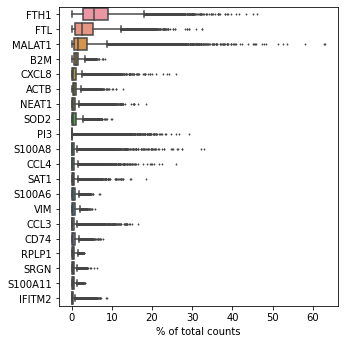

In [51]:
sc.pl.highest_expr_genes(adata_merge_late_no_mito, n_top=20)

In [52]:
#Normalize counts by 10,000 reads per cell
sc.pp.normalize_total(adata_merge_early_no_mito, target_sum=1e4)
sc.pp.normalize_total(adata_merge_late_no_mito, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [53]:
sc.pp.log1p(adata_merge_early_no_mito)
sc.pp.log1p(adata_merge_late_no_mito)

In [54]:
sc.pp.highly_variable_genes(adata_merge_early_no_mito, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(adata_merge_late_no_mito, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


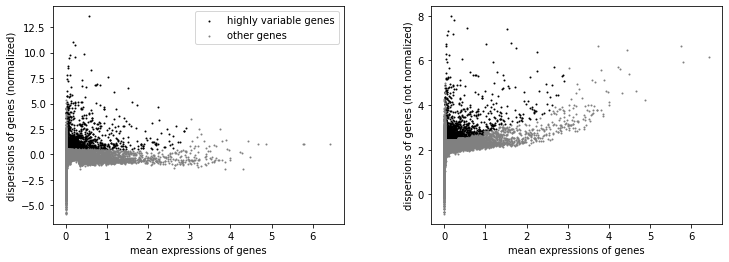

In [55]:
sc.pl.highly_variable_genes(adata_merge_early_no_mito)

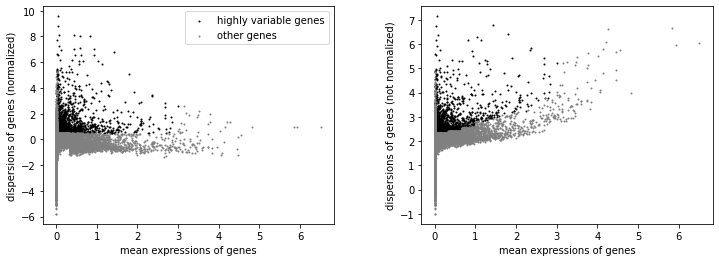

In [56]:
sc.pl.highly_variable_genes(adata_merge_late_no_mito)

In [57]:
adata_merge_early_no_mito.raw = adata_merge_early_no_mito
adata_merge_late_no_mito.raw = adata_merge_late_no_mito
#Set the .raw attribute of AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.

In [58]:
sc.pp.regress_out(adata_merge_early_no_mito, ['n_genes_by_counts','percent_mito'])
sc.pp.regress_out(adata_merge_late_no_mito,['n_genes_by_counts','percent_mito'])

regressing out ['n_genes_by_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


    finished (0:05:06)
regressing out ['n_genes_by_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:06:59)


In [59]:
sc.pp.scale(adata_merge_early_no_mito, max_value=10)
sc.pp.scale(adata_merge_late_no_mito, max_value=10)

In [60]:
sc.tl.pca(adata_merge_early_no_mito, svd_solver='arpack',n_comps=80)
sc.tl.pca(adata_merge_late_no_mito, svd_solver='arpack',n_comps=80)

computing PCA
    on highly variable genes
    with n_comps=80


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


    finished (0:00:03)
computing PCA
    on highly variable genes
    with n_comps=80


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


    finished (0:00:04)


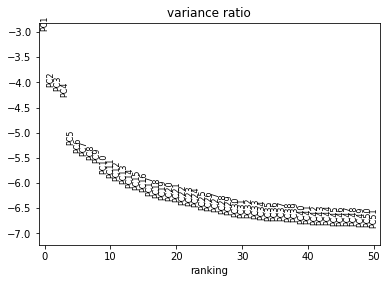

In [61]:
sc.pl.pca_variance_ratio(adata_merge_early_no_mito, log=True,n_pcs=50)

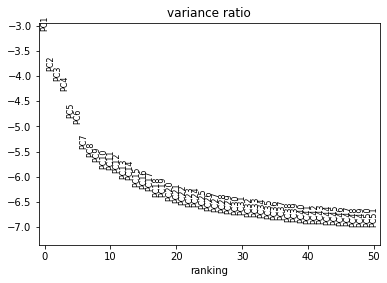

In [62]:
sc.pl.pca_variance_ratio(adata_merge_late_no_mito, log=True,n_pcs=50)

# Batch Correct Using Harmony

In [63]:
import scanpy.external as sce 

In [64]:
sce.pp.harmony_integrate(adata_merge_early_no_mito, 'Identity')

2021-03-01 13:14:02,692 - harmonypy - INFO - Iteration 1 of 10
2021-03-01 13:14:09,068 - harmonypy - INFO - Iteration 2 of 10
2021-03-01 13:14:15,445 - harmonypy - INFO - Iteration 3 of 10
2021-03-01 13:14:21,877 - harmonypy - INFO - Iteration 4 of 10
2021-03-01 13:14:28,250 - harmonypy - INFO - Iteration 5 of 10
2021-03-01 13:14:33,300 - harmonypy - INFO - Converged after 5 iterations


In [65]:
sce.pp.harmony_integrate(adata_merge_late_no_mito, 'Identity')

2021-03-01 13:15:14,205 - harmonypy - INFO - Iteration 1 of 10
2021-03-01 13:15:23,152 - harmonypy - INFO - Iteration 2 of 10
2021-03-01 13:15:32,071 - harmonypy - INFO - Converged after 2 iterations


In [66]:
'X_pca_harmony' in adata_merge_early_no_mito.obsm
'X_pca_harmony' in adata_merge_late_no_mito.obsm

True

In [67]:
adata_merge_early_no_mito.obsm['X_pca'] = adata_merge_early_no_mito.obsm['X_pca_harmony']
adata_merge_late_no_mito.obsm['X_pca'] = adata_merge_late_no_mito.obsm['X_pca_harmony']

In [68]:
sc.pp.neighbors(adata_merge_early_no_mito, n_neighbors=15, n_pcs=40)
sc.pp.neighbors(adata_merge_late_no_mito, n_neighbors=15, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [69]:
sc.tl.tsne(adata_merge_early_no_mito, n_jobs=20)
sc.tl.tsne(adata_merge_late_no_mito, n_jobs=20)

computing tSNE
    using 'X_pca' with n_pcs = 80
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:40)
computing tSNE
    using 'X_pca' with n_pcs = 80
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:55)


In [70]:
sc.tl.umap(adata_merge_early_no_mito)
sc.tl.umap(adata_merge_late_no_mito)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


In [71]:
sc.tl.draw_graph(adata_merge_early_no_mito, n_jobs=20)
sc.tl.draw_graph(adata_merge_late_no_mito, n_jobs=20)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:04)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:33)


In [72]:
sc.tl.leiden(adata_merge_early_no_mito, key_added='leiden')
sc.tl.leiden(adata_merge_early_no_mito, resolution=0.6, key_added='leiden_r0.6')
sc.tl.leiden(adata_merge_early_no_mito, resolution=0.5, key_added='leiden_r0.5')

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:07)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_r0.6', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_r0.5', the cluster labels (adata.obs, categorical) (0:00:04)


In [73]:
sc.tl.leiden(adata_merge_late_no_mito, key_added='leiden')
sc.tl.leiden(adata_merge_late_no_mito, resolution=0.6, key_added='leiden_r0.6')
sc.tl.leiden(adata_merge_late_no_mito, resolution=0.5, key_added='leiden_r0.5')

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_r0.6', the cluster labels (adata.obs, categorical) (0:00:10)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_r0.5', the cluster labels (adata.obs, categorical) (0:00:09)


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


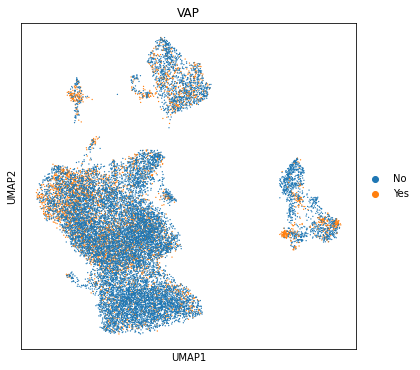

In [74]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_early_no_mito, color='VAP')

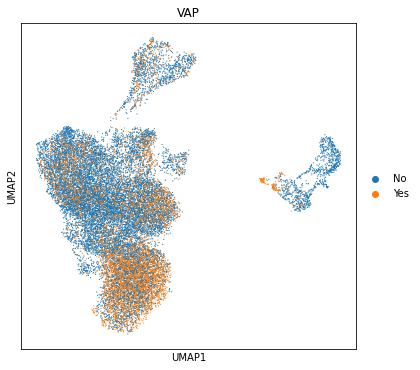

In [75]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='VAP')

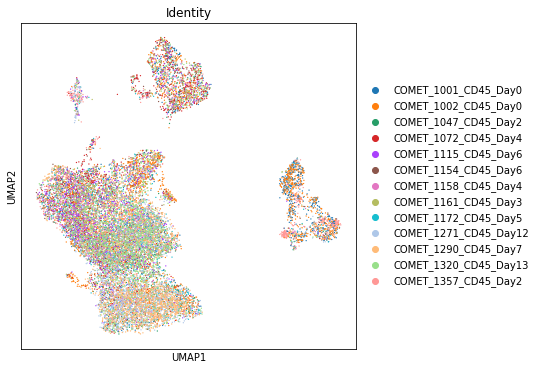

In [76]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_early_no_mito, color='Identity')

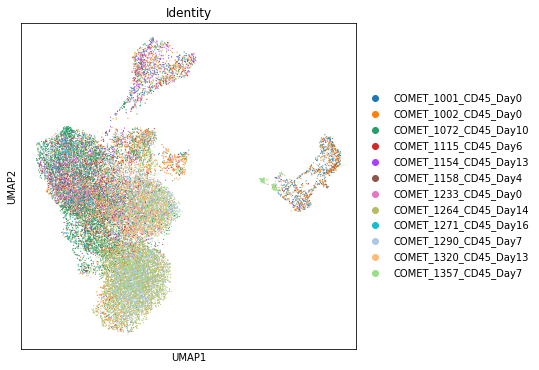

In [77]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='Identity')

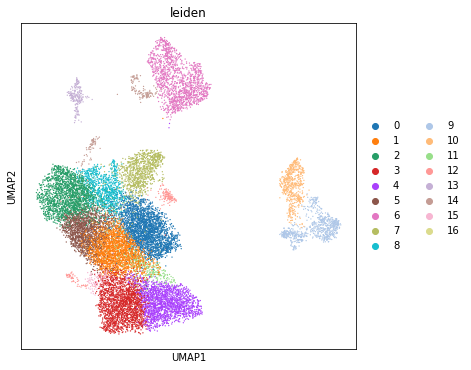

In [78]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_early_no_mito, color='leiden')

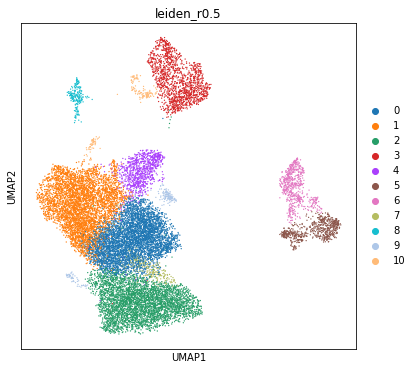

In [82]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_early_no_mito, color='leiden_r0.5')

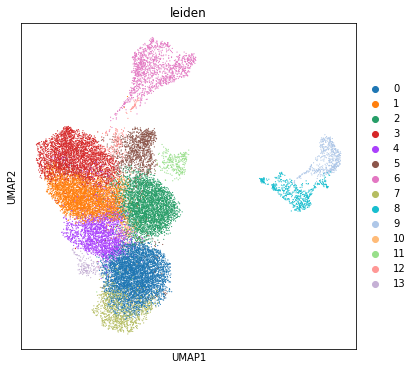

In [79]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='leiden')

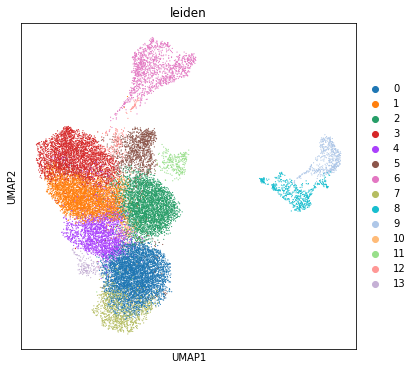

In [84]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='leiden')

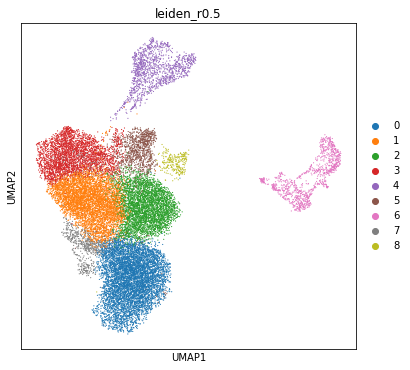

In [80]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='leiden_r0.5')

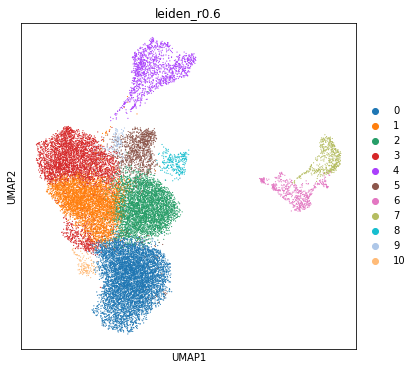

In [81]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='leiden_r0.6')

In [96]:
sc.tl.rank_genes_groups(adata_merge_early_no_mito, 'leiden', method='wilcoxon',corr_method='benjamini-hochberg',key_added='leiden_overRest')


ranking genes


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


    finished: added to `.uns['leiden_overRest']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:25)


In [97]:
sc.tl.rank_genes_groups(adata_merge_late_no_mito, 'leiden', method='wilcoxon',corr_method='benjamini-hochberg',key_added='leiden_overRest')


ranking genes
    finished: added to `.uns['leiden_overRest']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:30)


# Top Marker Genes

In [98]:
adata_merge_early_cluster_genes = pd.DataFrame(adata_merge_early_no_mito.uns['leiden_overRest']['names'])
adata_merge_early_cluster_genes.iloc[:50]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,EREG,SH3BGRL3,APOC1,NEAT1,IFITM2,FTL,RPS15A,HSP90AA1,CD74,WFDC2,WFDC2,IFIT3,MT1G,RPS18,STMN1,MALAT1,IGHV1-24
1,CXCL2,TIMP1,APOE,SQSTM1,NAMPT,TMSB10,IL32,HSPA1A,HLA-DPA1,SLPI,GSTP1,GBP1,MT2A,RPL18A,HIST1H4C,NEAT1,IGLV3-19
2,CXCL3,CCL2,FTL,PHACTR1,SRGN,CSTB,CD3E,HSPH1,HLA-DPB1,LCN2,PRDX5,GBP5,MT1F,RPS23,TUBB,CD44,IGKV1-17
3,ANXA5,S100A10,FABP5,CXCL8,S100A8,SERF2,RPS3,HSPB1,HLA-DRA,KRT19,TSPAN1,ISG15,MT1X,IGKC,PTMA,KLF6,GLUL
4,IL1B,S100A6,C1QB,PI3,CSF3R,SH3BGRL3,PTPRCAP,HSPE1,HLA-DRB1,GSTP1,C20orf85,IFIT2,MT1H,RPLP1,HMGB1,DMXL2,MT2A
5,BTG1,VIM,C1QC,MALAT1,S100A9,LGALS3,RPL11,DNAJB1,HLA-DQA1,AGR2,LCN2,IFITM3,ATP5F1E,RPL37,H2AFZ,ZEB2,FTL
6,KYNU,S100A4,CTSB,IFITM2,NEAT1,S100A10,RPL30,HSP90AB1,HLA-DQB1,KRT18,CAPS,MX1,AIF1,RPLP0,HMGB2,ITGAX,ACSL1
7,CD44,VCAN,CD68,SOD2,CXCL8,GPX4,CD3D,HSPD1,CST3,CXCL17,SLPI,CCL2,ACTB,RPL32,HMGN2,SLC11A1,SLC39A8
8,IER3,CTSL,CD74,NAMPT,SOD2,FTH1,RPS27A,HSPA1B,C1QB,SERPINB3,DYNLL1,PSMB9,IFI30,RPS15A,GAPDH,CTSD,NEAT1
9,TIMP1,ANXA5,ACP5,ASAH1,G0S2,ATP5F1E,RPL28,HSPA8,C1QA,SCGB3A1,C9orf24,VAMP5,RPL39,RPL28,RPLP0,RNF213,PFN1


In [107]:
adata_merge_late_cluster_genes = pd.DataFrame(adata_merge_late_no_mito.uns['leiden_overRest']['names'])
adata_merge_late_cluster_genes.iloc[:50]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,PHACTR1,S100A10,EREG,C1QB,CYP27A1,HSP90AA1,RPS15A,IFITM2,LCN2,WFDC2,GBP1,MT2A,HLA-DPA1,NEAT1
1,SOD2,SH3BGRL3,IL1B,C1QC,ACP5,HSPA1A,RPL28,S100A8,KRT19,GSTP1,RNF213,MT1G,HLA-DQA1,MALAT1
2,AQP9,S100A6,BTG1,APOE,FBP1,HSPH1,RPS3,S100A9,SLPI,PRDX5,ISG15,MT1X,HLA-DPB1,CTSD
3,NEAT1,SERF2,CXCL3,APOC1,FTL,DNAJB1,CD3E,NAMPT,WFDC2,TSPAN1,IFIT3,MT1F,HLA-DRA,TCF25
4,PI3,FAU,CXCL2,CD74,VAT1,HSPE1,RPS27A,G0S2,ACTG1,SLPI,GBP5,MT1H,CD74,SPP1
5,NAMPT,RPS13,TIMP1,C1QA,CD68,HSPB1,RPL30,BCL2A1,TACSTD2,C20orf85,MX1,AIF1,HLA-DRB1,LRRFIP1
6,IFITM2,RPS8,CD44,FABP5,GPNMB,HSPA1B,CD3D,IFITM1,GSTP1,LCN2,STAT1,ACTB,HLA-DQB1,LMNA
7,PLEK,RPL39,ANXA5,HLA-DPA1,BCAP31,HSP90AB1,IL32,CSF3R,CXCL17,CAPS,IFIT2,IFI30,RPL10,SLC11A1
8,SQSTM1,RPL11,IER3,CTSB,RGCC,HSPA8,PTPRCAP,SRGN,CLDN4,DYNLL1,TNFSF13B,ATP5F1E,RPS3A,TYMP
9,SRGN,CTSL,OLR1,CST3,FABP5,HSPD1,RPL11,NFKBIA,AGR2,C9orf24,GBP4,RPL39,EEF1A1,CD44


In [99]:
marker_genes_dict = {'B-cell': ['CD79A', 'MS4A1','JCHAIN','MZB1'],
                     'T-cell': ['CD3D','CD3E','LCK',"IL32",'CD2','PTPRCAP'],
                     'T-CD8+': ['CD8A', 'CD8B'],
                     'T-CD4+': ['CD4','GATA3','FOXP3','IL17A','IFNG'],
                     'NK': ['GNLY', 'NKG7'],
                     'Myeloid': ['CST3', 'LYZ'],
                     'Mono/Macro': ['FCGR3A','CD14','CD68','MARCO','C1QA','APOE','APOC1','FCN1','CD163','FABP4','COL6A3'],
                     'Neutrophil':['FCGR3B','CXCR2','PROK2','S100A8','SRGN','NAMPT'],
                     'Dendritic': ['FCER1A','LAMP3','CD1E'],
                     'Epithelial':['KRT18','EPCAM','KRT17'],
                     'Basal':['KRT5','TP63'],                   
                     'Secretory':['SPDEF','CREB3L1','MUC5B','MUC5AC'],
                     'Ciliated':['FOXJ1','SNTN','CDHR3','TPPP3'],
                     
                    }

    using 'X_pca' with n_pcs = 80
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`
categories: 0, 1, 2, etc.
var_group_labels: B-cell, T-cell, T-CD8+, etc.


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


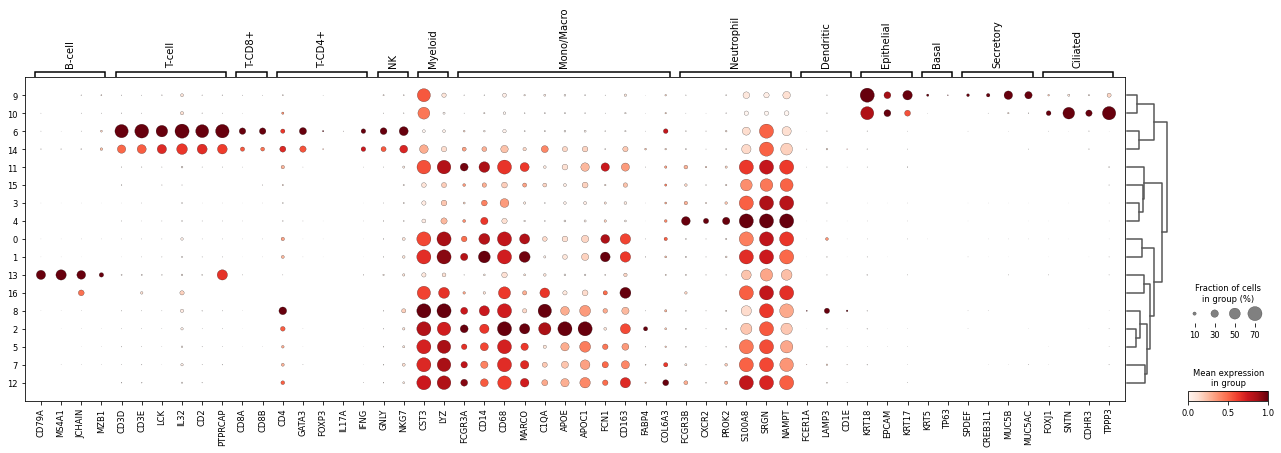

In [100]:
ax = sc.pl.dotplot(adata_merge_early_no_mito, marker_genes_dict, 
                   groupby='leiden',dot_max=0.7, standard_scale='var',dendrogram=True)

In [104]:
#My manual annnotation to Early Timepoints, Bacterial infection Not batch corrected

adata_merge_early_no_mito.obs['annotated'] = adata_merge_early_no_mito.obs['leiden'].cat.add_categories(['B cell','Neutrophil','T cells/Natural Killer','Secretory','Cilliated','Mono/Mac'])
adata_merge_early_no_mito.obs['annotated'][np.in1d(adata_merge_early_no_mito.obs['annotated'], ['13','16'])] = 'B cell'
adata_merge_early_no_mito.obs['annotated'][np.in1d(adata_merge_early_no_mito.obs['annotated'], ['3','4'])] = 'Neutrophil'
adata_merge_early_no_mito.obs['annotated'][np.in1d(adata_merge_early_no_mito.obs['annotated'], ['6','14'])] = 'T cells/Natural Killer'
adata_merge_early_no_mito.obs['annotated'][np.in1d(adata_merge_early_no_mito.obs['annotated'], ['10'])] = 'Cilliated'
adata_merge_early_no_mito.obs['annotated'][np.in1d(adata_merge_early_no_mito.obs['annotated'], ['9'])] = 'Secretory'
adata_merge_early_no_mito.obs['annotated'][np.in1d(adata_merge_early_no_mito.obs['annotated'], ['0','1','2','5','7','8','11','12','15'])] = 'Mono/Mac'


adata_merge_early_no_mito.obs['annotated'] = adata_merge_early_no_mito.obs['annotated'].cat.remove_unused_categories()



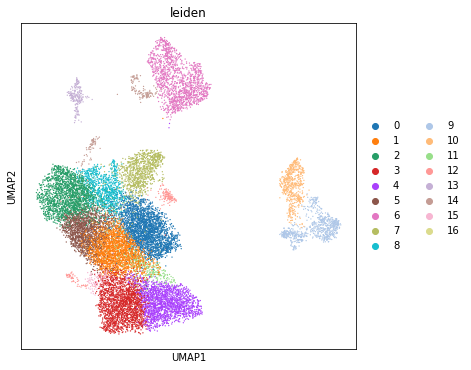

In [105]:
sc.pl.umap(adata_merge_early_no_mito, color='leiden')

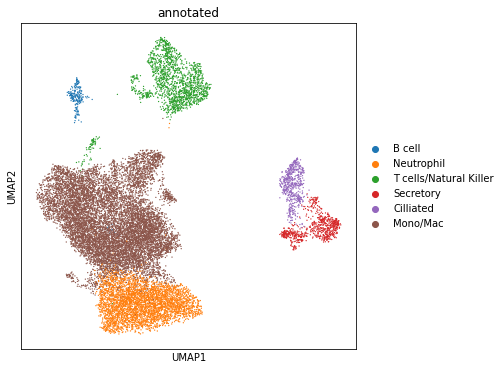

In [106]:
sc.pl.umap(adata_merge_early_no_mito, color='annotated')

    using 'X_pca' with n_pcs = 80
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`
categories: 0, 1, 2, etc.
var_group_labels: B-cell, T-cell, T-CD8+, etc.


/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


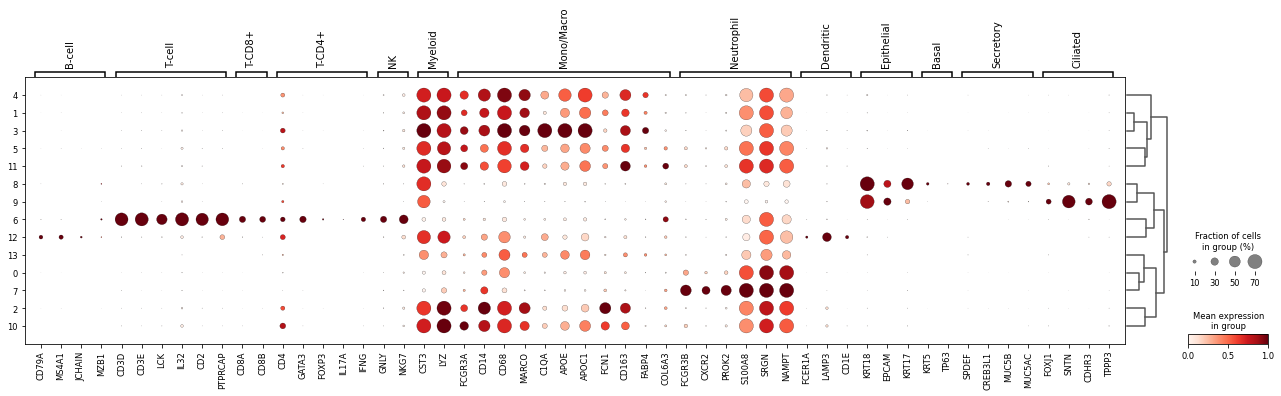

In [93]:
ax2=sc.pl.dotplot(adata_merge_late_no_mito, marker_genes_dict, groupby='leiden', dot_max=0.7, standard_scale='var',dendrogram=True)

/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


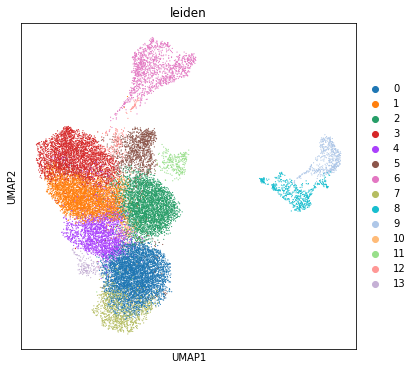

In [94]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='leiden')

In [108]:
#My manual annnotation to Late Timepoints, Bacterial infection Not batch corrected

adata_merge_late_no_mito.obs['annotated'] = adata_merge_late_no_mito.obs['leiden'].cat.add_categories(['B cell/Dendritic','Neutrophil','T cells/Natural Killer','Secretory','Ciliated','Mono/Mac'])
adata_merge_late_no_mito.obs['annotated'][np.in1d(adata_merge_late_no_mito.obs['annotated'], ['12'])] = 'B cell/Dendritic'
adata_merge_late_no_mito.obs['annotated'][np.in1d(adata_merge_late_no_mito.obs['annotated'], ['0','7'])] = 'Neutrophil'
adata_merge_late_no_mito.obs['annotated'][np.in1d(adata_merge_late_no_mito.obs['annotated'], ['6'])] = 'T cells/Natural Killer'
adata_merge_late_no_mito.obs['annotated'][np.in1d(adata_merge_late_no_mito.obs['annotated'], ['8'])] = 'Secretory'
adata_merge_late_no_mito.obs['annotated'][np.in1d(adata_merge_late_no_mito.obs['annotated'], ['9'])] = 'Ciliated'
adata_merge_late_no_mito.obs['annotated'][np.in1d(adata_merge_late_no_mito.obs['annotated'], ['1','2','3','4','5','10','11','13'])] = 'Mono/Mac'


adata_merge_late_no_mito.obs['annotated'] = adata_merge_late_no_mito.obs['annotated'].cat.remove_unused_categories()



/home/ashleyb/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


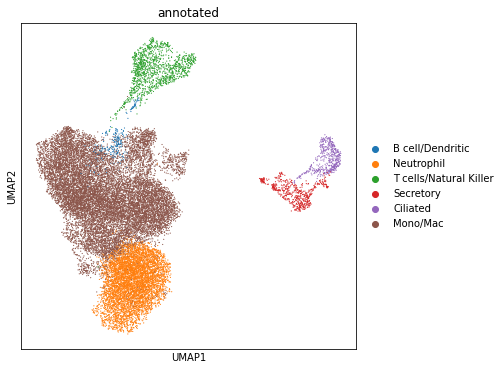

In [109]:
rcParams['figure.figsize']=6,6
sc.pl.umap(adata_merge_late_no_mito, color='annotated')